In [1]:
%load_ext autoreload
%autoreload 2
import numpy as np
import matplotlib.pyplot as plt
from coffea import util
from coffea.processor import accumulate
import os
import re
import pandas as pd
import hist
import matplotlib as mpl
import mplhep
import sys

sys.path.append("../../analysisTools/")
import plotTools as ptools
import utils

## Import coffea files -- signal and background

In [2]:
prefix = './coffea/skimmed/'
suffix = '_SRbeforeISRcuts_good_vtx_none_NJetG0'

In [3]:
# Signal
sig_histo = util.load(f'{prefix}/signal{suffix}.coffea')[0]

In [4]:
# Background
bkg_histo = util.load(f'{prefix}/bkg{suffix}.coffea')[0]

In [5]:
# Data
data_histo = util.load(f'{prefix}/data{suffix}.coffea')[0]

In [6]:
# sig_histo / bkg_histo is a dictionary of variables
print(sig_histo.keys())

dict_keys(['sel_e1_pt', 'sel_e1_eta', 'sel_e1_phi', 'sel_e1_dxy', 'sel_e1_dxySignif', 'sel_e1_vxy1', 'sel_e1_vz', 'sel_e2_pt', 'sel_e2_eta', 'sel_e2_phi', 'sel_e2_dxy', 'sel_e2_dxySignif', 'sel_e2_vxy1', 'sel_e2_vz', 'sel_vtx_dR', 'sel_vtx_mindxy', 'sel_vtx_vxy1', 'sel_vtx_vxy10', 'sel_vtx_vxy100', 'sel_vtx_leadpT', 'sel_vtx_METdPhi', 'sel_vtx_mindRj', 'sel_vtx_chi2', 'sel_vtx_mass', 'sel_vtx_mindPhiJ', 'sel_vtx_sign', 'sel_vtx_pt', 'sel_vtx_eta', 'sel_vtx_phi', 'sel_vtx_type', 'sel_vtx_minEleDrJ', 'sel_vtx_minEleDPhiJ', 'sel_vtx_mass_low', 'sel_vtx_mindxy_low', 'sel_vtx_sign_etaProd', 'sel_vtx_CosThetaColl', 'sel_vtx_LxyCosThetaColl', 'sel_vtx_LxyCosThetaCollZoom', 'sel_vtx_LxyCosThetaCollZoomZoom', 'sel_vtx_eleDphi', 'sel_vtx_maxMiniRelIso', 'sel_vtx_maxMiniRelIsoCorr', 'sel_vtx_vx_vs_vy', 'sel_vtx_phi_vs_METphi', 'PVx_vs_PVy', 'PFMET', 'PFMET1000', 'PFMETphi', 'jetMETdPhi', 'minJetMETdPhi', 'nJets', 'lead_jet_pt', 'lead_jet_eta', 'jetMETratio', 'PVx', 'PVy', 'cutDesc', 'cutflow', 'c

## Signal

In [9]:
sig_samples = list(sig_histo['cutflow'].keys())
si = pd.DataFrame.from_dict({s:ptools.signalPoint(s) for s in sig_samples}, orient='index')

In [10]:
cutnames = utils.get_signal_list_of_cuts(sig_histo)
cutnames

['Preselections', 'n(good vertex) > 0', 'No b-tagged jets']

In [11]:
# Efficiency
pd.options.display.float_format = '{:,.6f}'.format
eff_cutflow = utils.get_signal_cutflow_dict(sig_histo, 'cutflow')

In [12]:
table = eff_cutflow
table.columns = cutnames

In [13]:
# Per ctau
for ct in [1, 10, 100]:
    points = (si["ctau"] == ct)
    
    df = table.loc[list(si[points].name)]

    outdir = './csv/Cutflow/Efficiency/'
    outname = f'Signal_ctau-{int(ct)}_samples_Efficiency_{suffix}'
    
    df_to_save = df
    
    utils.save_df_to_csv(df_to_save, outdir, outname, isSignal=True)

Saved: ./csv/Cutflow/Efficiency//Signal_ctau-1_samples_Efficiency__SRbeforeISRcuts_good_vtx_none_NJetG0.csv
Saved: ./csv/Cutflow/Efficiency//Signal_ctau-10_samples_Efficiency__SRbeforeISRcuts_good_vtx_none_NJetG0.csv
Saved: ./csv/Cutflow/Efficiency//Signal_ctau-100_samples_Efficiency__SRbeforeISRcuts_good_vtx_none_NJetG0.csv


In [14]:
# Weighted event count
pd.options.display.float_format = '{:,.4f}'.format
cts_cutflow = utils.get_signal_cutflow_dict(sig_histo, 'cutflow_cts')

In [15]:
table = cts_cutflow
table.columns = cutnames

In [16]:
# ctau = 1mm
ct = 1.0

points = (si["ctau"] == ct)

df = table.loc[list(si[points].name)]
df

,Preselections,n(good vertex) > 0,No b-tagged jets
sig_2018_Mchi-99p0_dMchi-18p0_ctau-1,44.3947,44.1691,35.9532
sig_2018_Mchi-94p5_dMchi-9p0_ctau-1,"1,164.1743","1,156.9312",972.3465
sig_2018_Mchi-84p0_dMchi-8p0_ctau-1,"1,466.2272","1,457.7156","1,224.9125"
sig_2018_Mchi-77p0_dMchi-14p0_ctau-1,75.1374,74.7132,61.4622
sig_2018_Mchi-73p5_dMchi-7p0_ctau-1,"1,976.3460","1,964.2733","1,636.9024"
sig_2018_Mchi-63p0_dMchi-6p0_ctau-1,"2,742.8429","2,725.2304","2,288.3110"
sig_2018_Mchi-5p5_dMchi-1p0_ctau-1,"1,632.8390","1,620.1785","1,294.0099"
sig_2018_Mchi-5p25_dMchi-0p5_ctau-1,"33,995.1698","33,765.0692","27,824.6664"
sig_2018_Mchi-55p0_dMchi-10p0_ctau-1,168.2571,167.4818,136.2244
sig_2018_Mchi-52p5_dMchi-5p0_ctau-1,"4,212.7201","4,184.6537","3,517.5364"


In [17]:
# Per ctau
for ct in [1, 10, 100]:
    points = (si["ctau"] == ct)
    
    df = table.loc[list(si[points].name)]

    outdir = './csv/Cutflow/Efficiency/'
    outname = f'Signal_ctau-{int(ct)}_samples_EventCount_Weighted_{suffix}'
    
    df_to_save = df
    
    utils.save_df_to_csv(df_to_save, outdir, outname, isSignal=True)

Saved: ./csv/Cutflow/Efficiency//Signal_ctau-1_samples_EventCount_Weighted__SRbeforeISRcuts_good_vtx_none_NJetG0.csv
Saved: ./csv/Cutflow/Efficiency//Signal_ctau-10_samples_EventCount_Weighted__SRbeforeISRcuts_good_vtx_none_NJetG0.csv
Saved: ./csv/Cutflow/Efficiency//Signal_ctau-100_samples_EventCount_Weighted__SRbeforeISRcuts_good_vtx_none_NJetG0.csv


In [18]:
# Raw count
pd.options.display.float_format = '{:,.4f}'.format
raw_cutflow = utils.get_signal_cutflow_dict(sig_histo, 'cutflow_nevts')

In [19]:
table = raw_cutflow
table.columns = cutnames

In [20]:
# ctau = 1mm
ct = 1.0

points = (si["ctau"] == ct)

df = table.loc[list(si[points].name)]
df

,Preselections,n(good vertex) > 0,No b-tagged jets
sig_2018_Mchi-99p0_dMchi-18p0_ctau-1,28531,28386,23106
sig_2018_Mchi-94p5_dMchi-9p0_ctau-1,36636,36408,30599
sig_2018_Mchi-84p0_dMchi-8p0_ctau-1,12401,12329,10360
sig_2018_Mchi-77p0_dMchi-14p0_ctau-1,12044,11976,9852
sig_2018_Mchi-73p5_dMchi-7p0_ctau-1,10969,10902,9085
sig_2018_Mchi-63p0_dMchi-6p0_ctau-1,9197,9138,7673
sig_2018_Mchi-5p5_dMchi-1p0_ctau-1,2578,2558,2043
sig_2018_Mchi-5p25_dMchi-0p5_ctau-1,1923,1910,1574
sig_2018_Mchi-55p0_dMchi-10p0_ctau-1,651,648,527
sig_2018_Mchi-52p5_dMchi-5p0_ctau-1,8853,8794,7392


In [21]:
# Per ctau
for ct in [1, 10, 100]:
    points = (si["ctau"] == ct)
    
    df = table.loc[list(si[points].name)]

    outdir = './csv/Cutflow/Efficiency/'
    outname = f'Signal_ctau-{int(ct)}_samples_Raw_{suffix}'
    
    df_to_save = df
    
    utils.save_df_to_csv(df_to_save, outdir, outname, isSignal=True)

Saved: ./csv/Cutflow/Efficiency//Signal_ctau-1_samples_Raw__SRbeforeISRcuts_good_vtx_none_NJetG0.csv
Saved: ./csv/Cutflow/Efficiency//Signal_ctau-10_samples_Raw__SRbeforeISRcuts_good_vtx_none_NJetG0.csv
Saved: ./csv/Cutflow/Efficiency//Signal_ctau-100_samples_Raw__SRbeforeISRcuts_good_vtx_none_NJetG0.csv


### Plot the efficiency

Saved: ./plots/cutflow//Cutflow__SRbeforeISRcuts_good_vtx_none_NJetG0_signal_delta_0p1_ct_1_m5to40.png


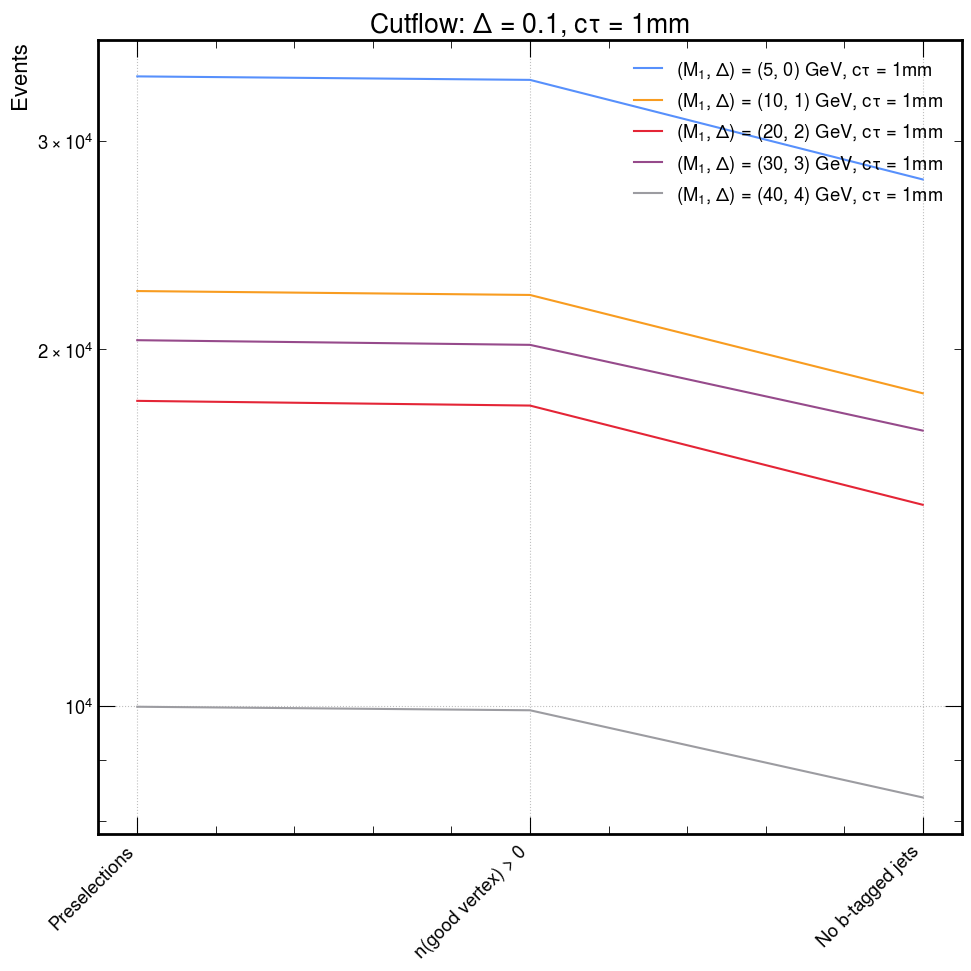

Saved: ./plots/cutflow//Cutflow__SRbeforeISRcuts_good_vtx_none_NJetG0_signal_delta_0p1_ct_10_m5to40.png


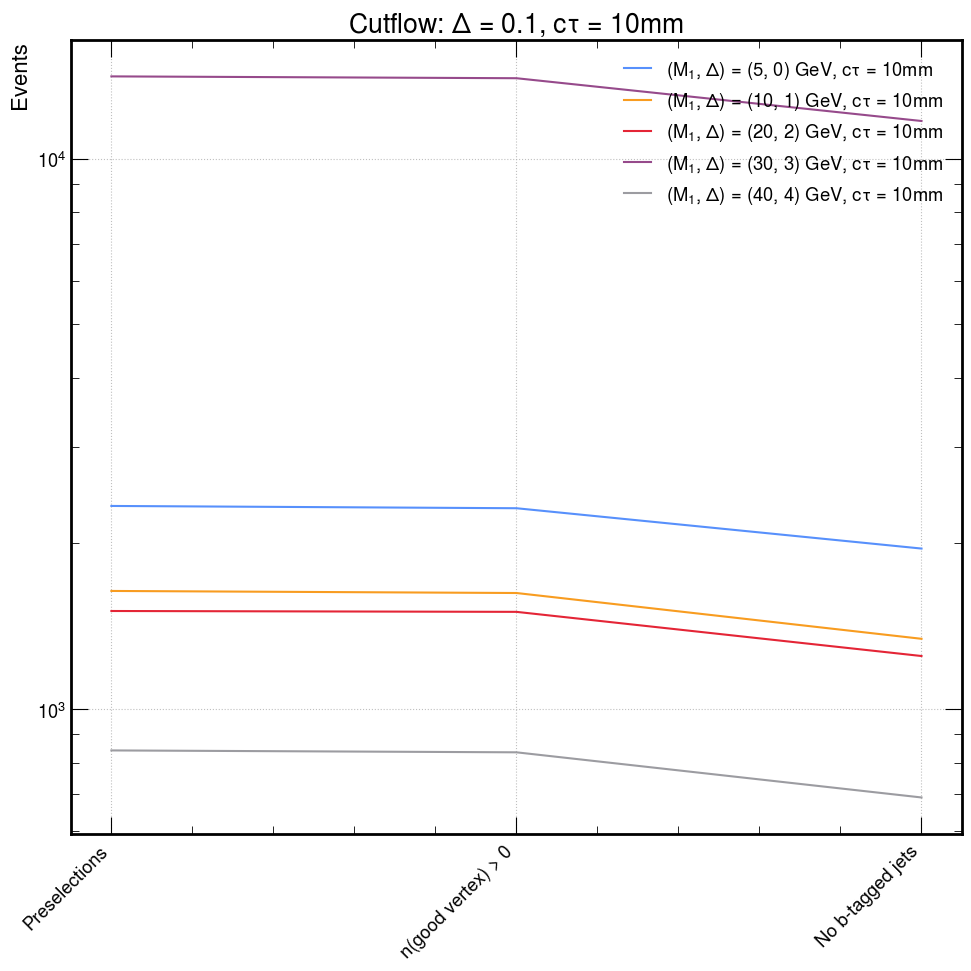

Saved: ./plots/cutflow//Cutflow__SRbeforeISRcuts_good_vtx_none_NJetG0_signal_delta_0p1_ct_100_m5to40.png


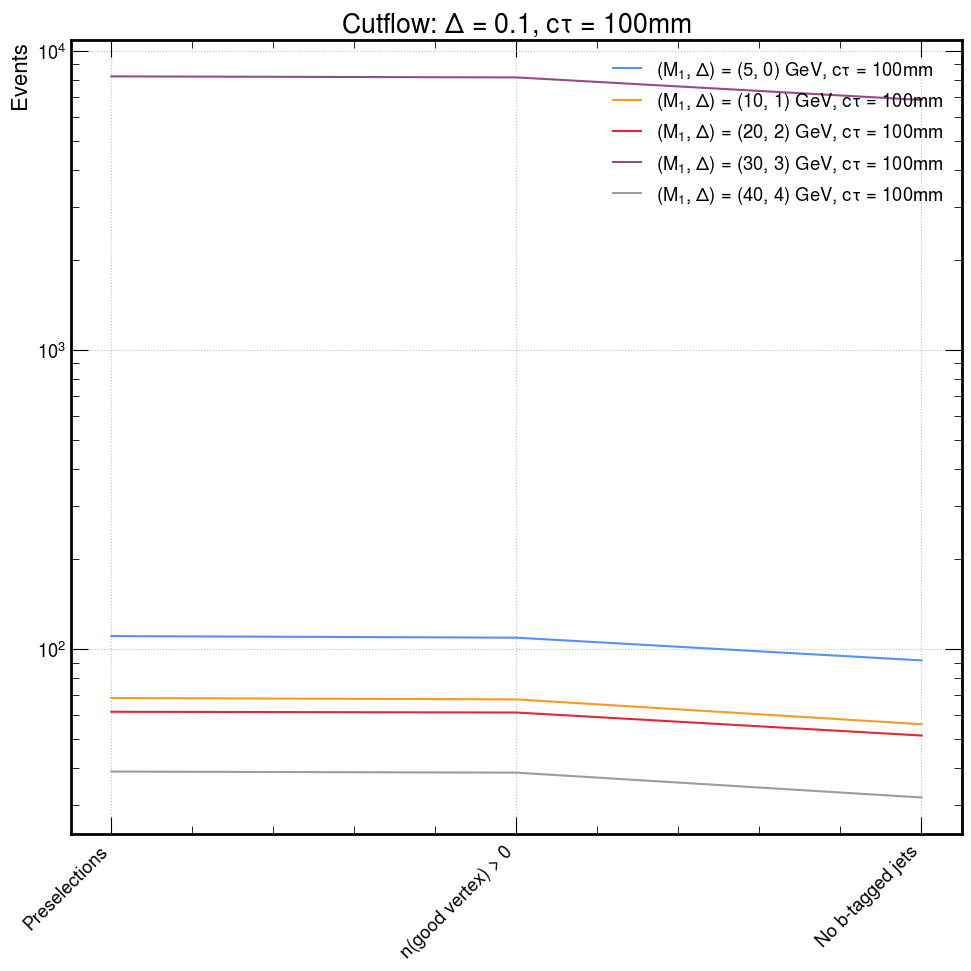

Saved: ./plots/cutflow//Cutflow__SRbeforeISRcuts_good_vtx_none_NJetG0_signal_delta_0p2_ct_1_m5to40.png


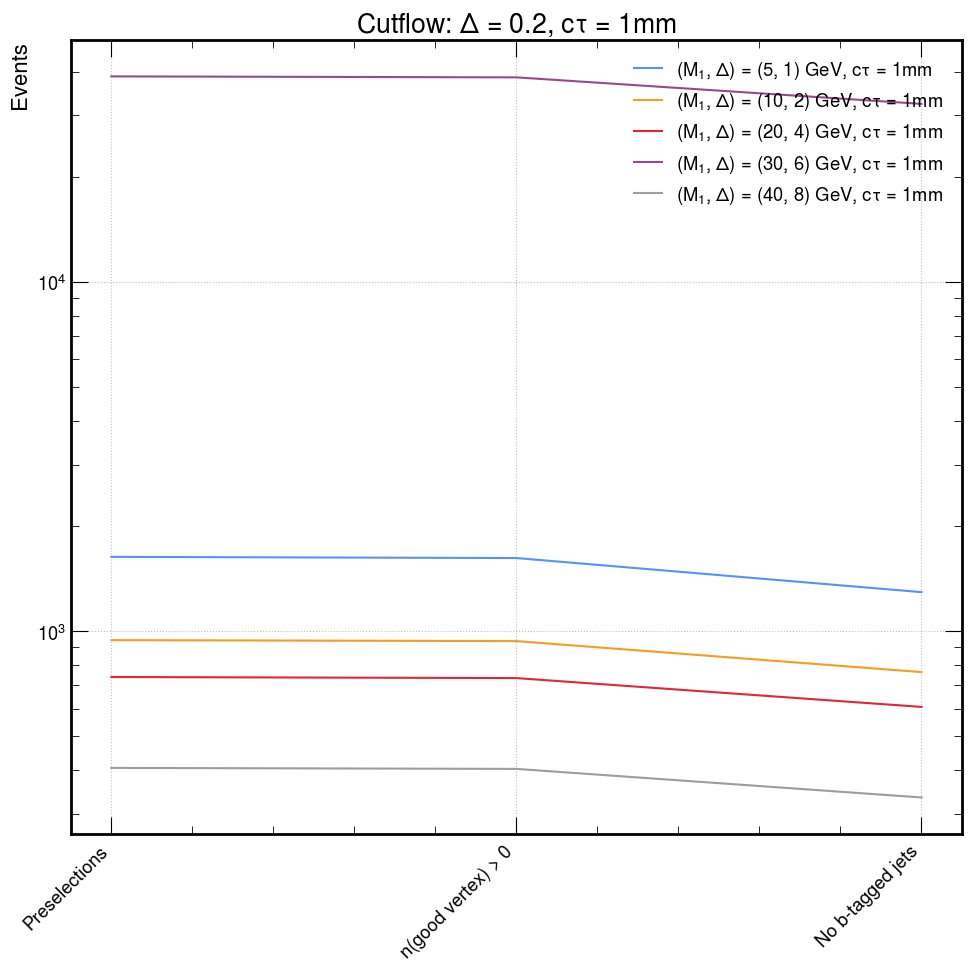

Saved: ./plots/cutflow//Cutflow__SRbeforeISRcuts_good_vtx_none_NJetG0_signal_delta_0p2_ct_10_m5to40.png


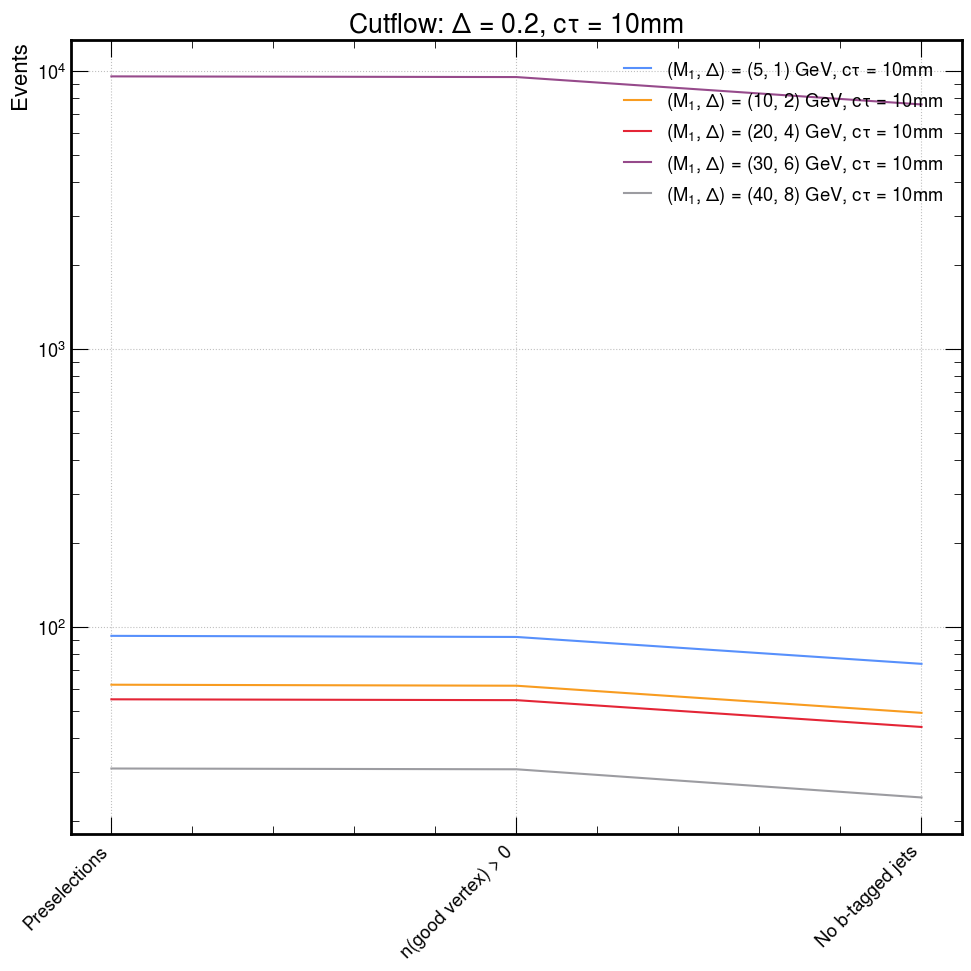

Saved: ./plots/cutflow//Cutflow__SRbeforeISRcuts_good_vtx_none_NJetG0_signal_delta_0p2_ct_100_m5to40.png


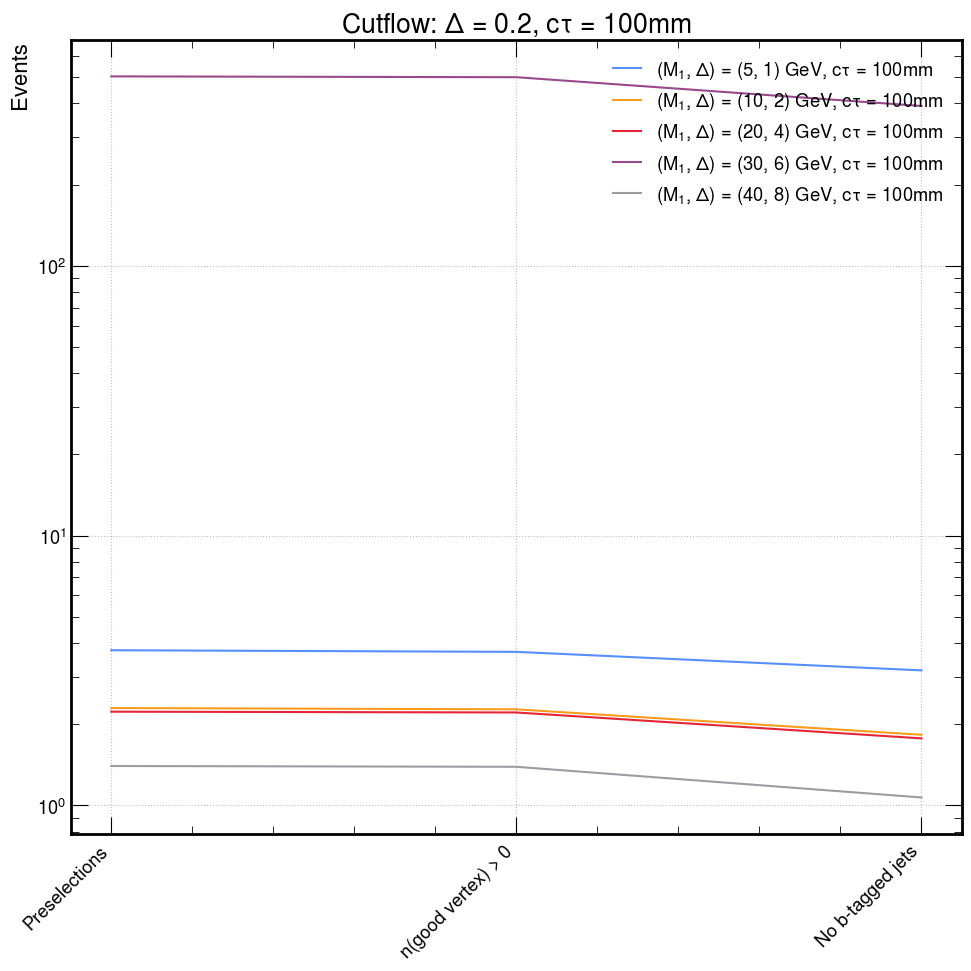

In [22]:
df = utils.get_signal_cutflow_dict(sig_histo, 'cutflow_cts')

fig, axes = plt.subplots()

plot_dict_sig_eff = {
    # Select signal points to display
    'm1s': [5, 10, 20, 30, 40],
    'deltas': [0.1],
    'ctaus': [1],

    # Plot display styling
    'ylim': None, # None for default; otherwise [ymin, ymax]
    'doLog': True,
    
    'ylabel': 'Events', # None for default
    'title': rf"Cutflow", 

    # Plot saving
    'doSave': True,
    'outDir': './plots/cutflow/',
    'outName': ''
}

# Delta 0.1 1mm

for delta in [0.1, 0.2]:
    for ctau in [1, 10, 100]:
        plot_dict_sig_eff['deltas'] = [delta]
        plot_dict_sig_eff['ctaus'] = [ctau]
        
        plot_dict_sig_eff['title'] = rf"Cutflow: $\Delta$ = {delta}, c$\tau$ = {ctau}mm"
        plot_dict_sig_eff['outName'] = rf"Cutflow_{suffix}_signal_delta_{str(delta).replace('.', 'p')}_ct_{ctau}_m5to40.png"
        
        ptools.plot_signal_efficiency(sig_histo, df, plot_dict_sig_eff)

Saved: ./plots/cutflow//Cutflow__SRbeforeISRcuts_good_vtx_none_NJetG0_signal_delta_0p1_ct_1_m50to100.png


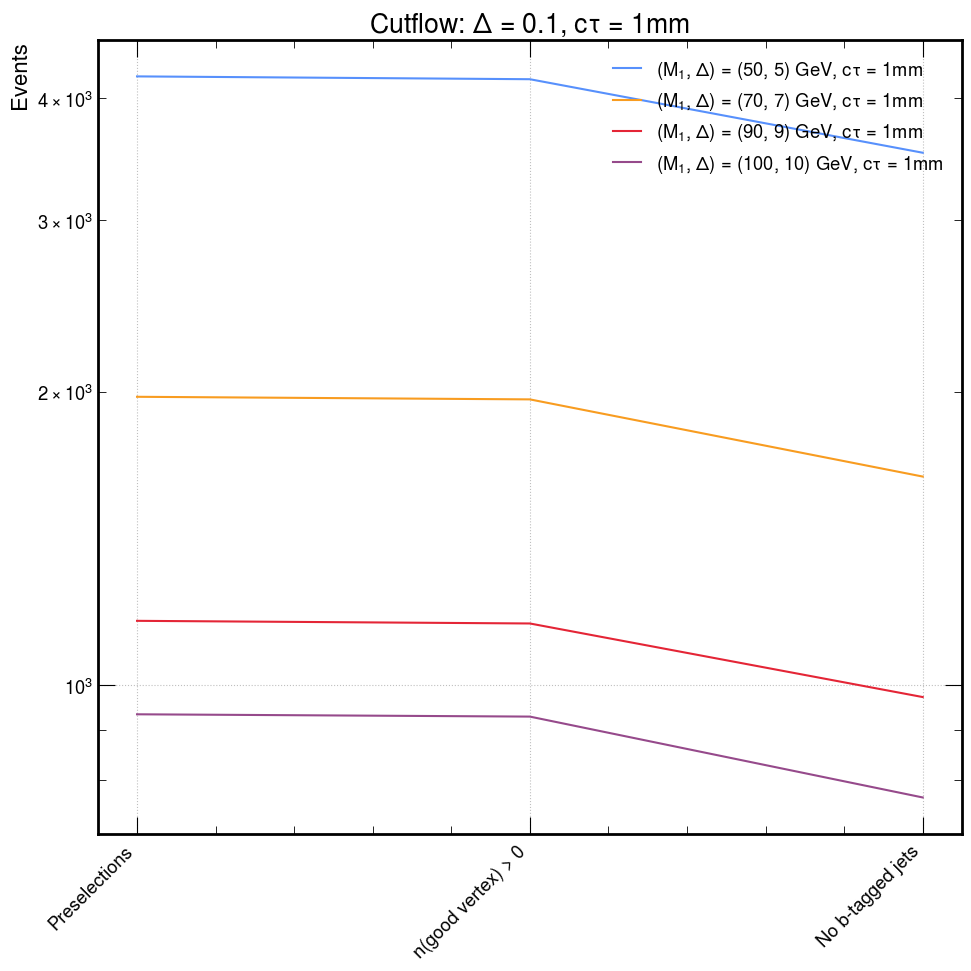

Saved: ./plots/cutflow//Cutflow__SRbeforeISRcuts_good_vtx_none_NJetG0_signal_delta_0p1_ct_10_m50to100.png


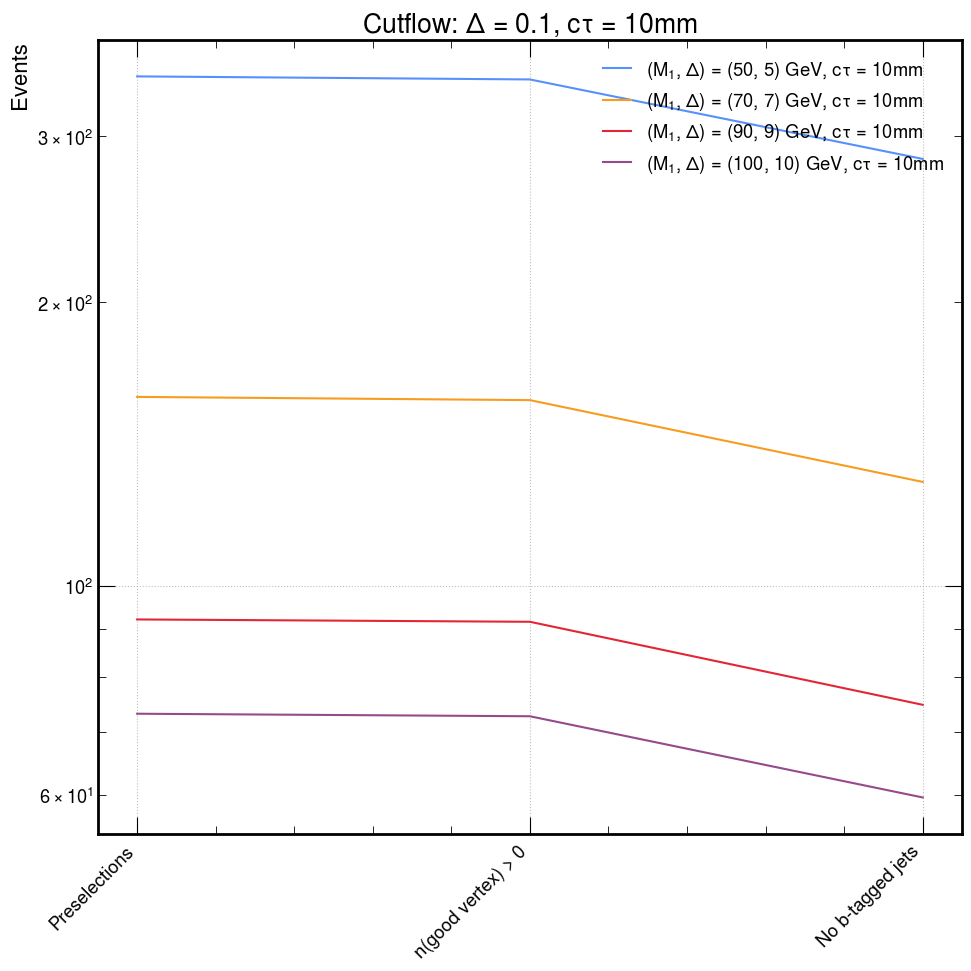

Saved: ./plots/cutflow//Cutflow__SRbeforeISRcuts_good_vtx_none_NJetG0_signal_delta_0p1_ct_100_m50to100.png


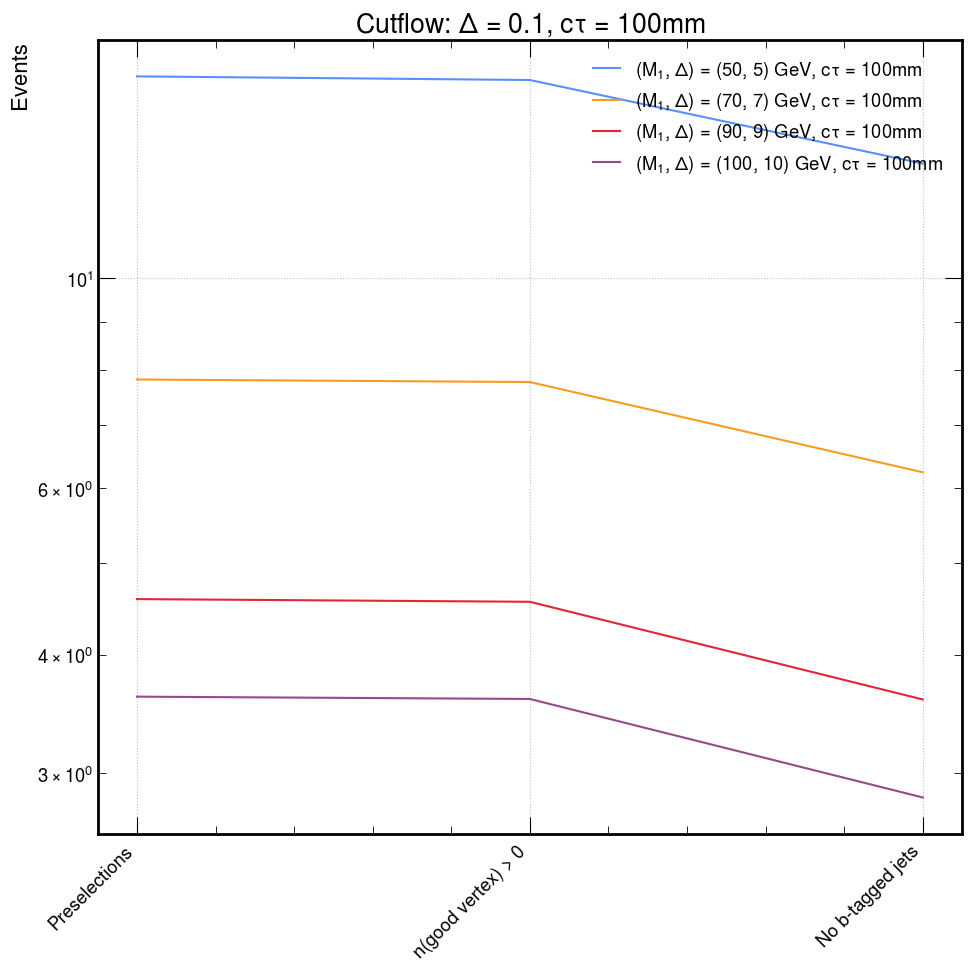

Saved: ./plots/cutflow//Cutflow__SRbeforeISRcuts_good_vtx_none_NJetG0_signal_delta_0p2_ct_1_m50to100.png


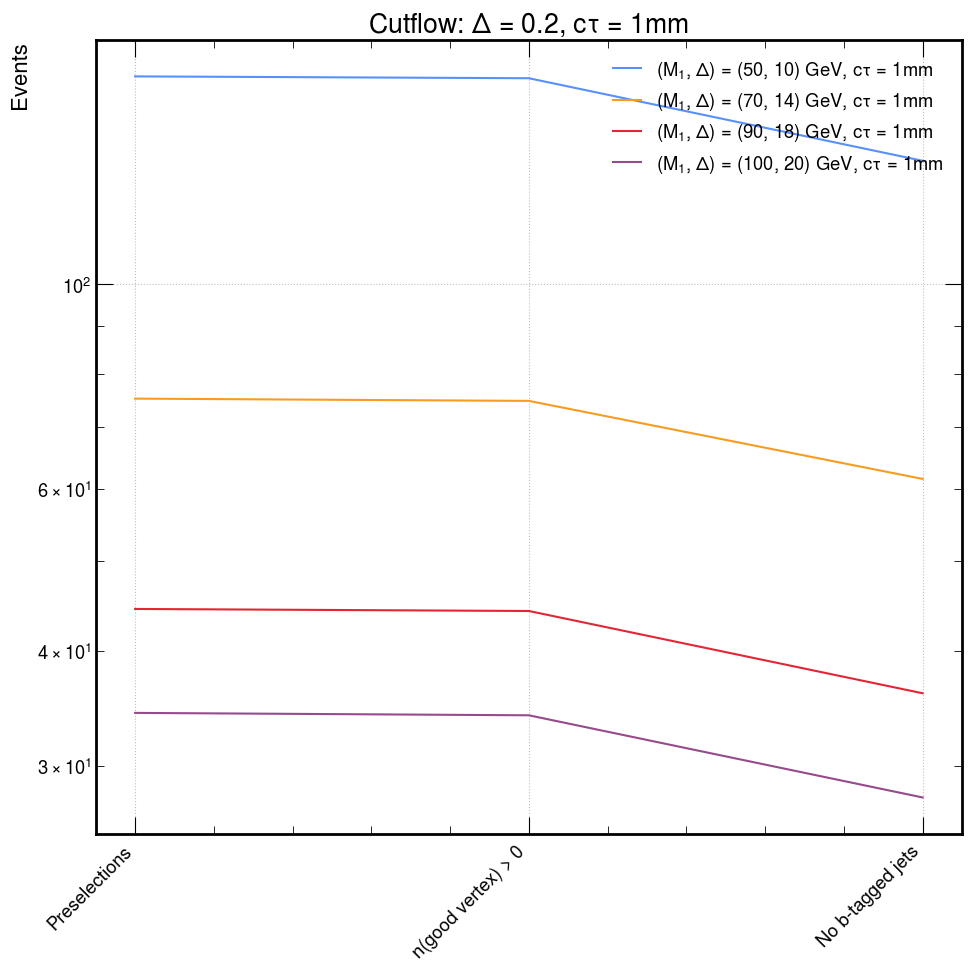

Saved: ./plots/cutflow//Cutflow__SRbeforeISRcuts_good_vtx_none_NJetG0_signal_delta_0p2_ct_10_m50to100.png


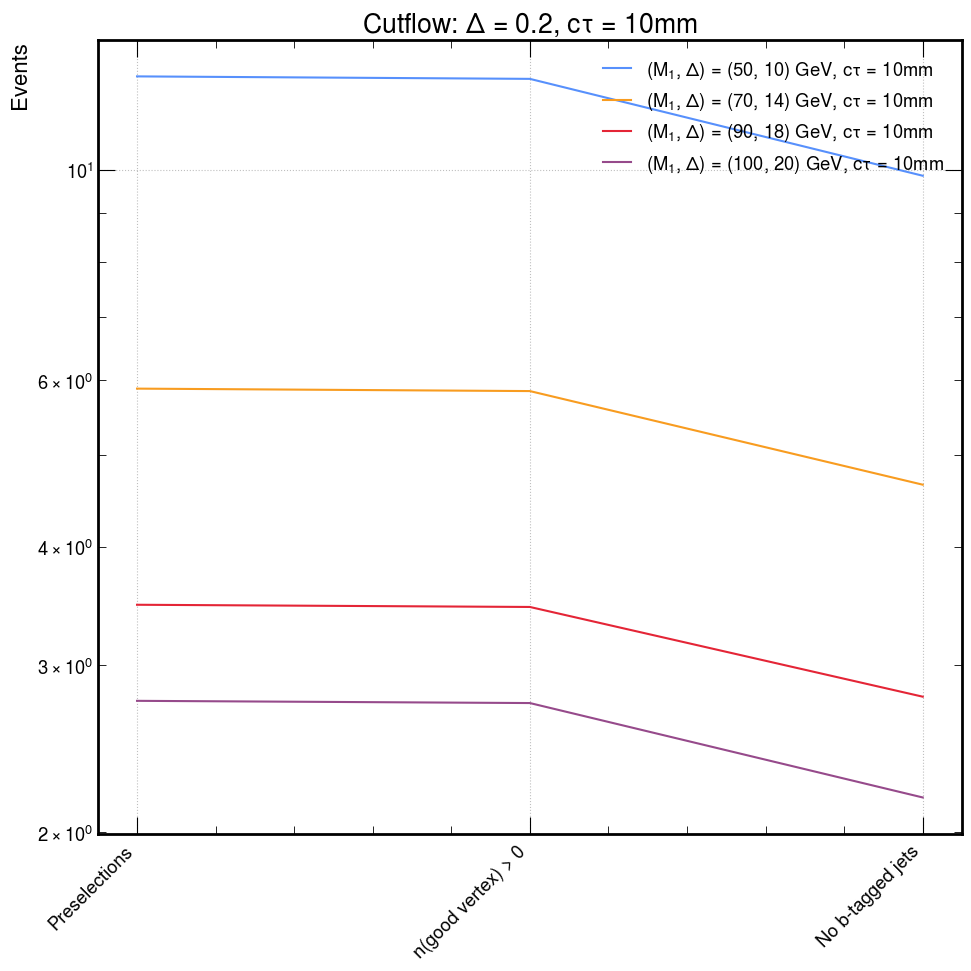

Saved: ./plots/cutflow//Cutflow__SRbeforeISRcuts_good_vtx_none_NJetG0_signal_delta_0p2_ct_100_m50to100.png


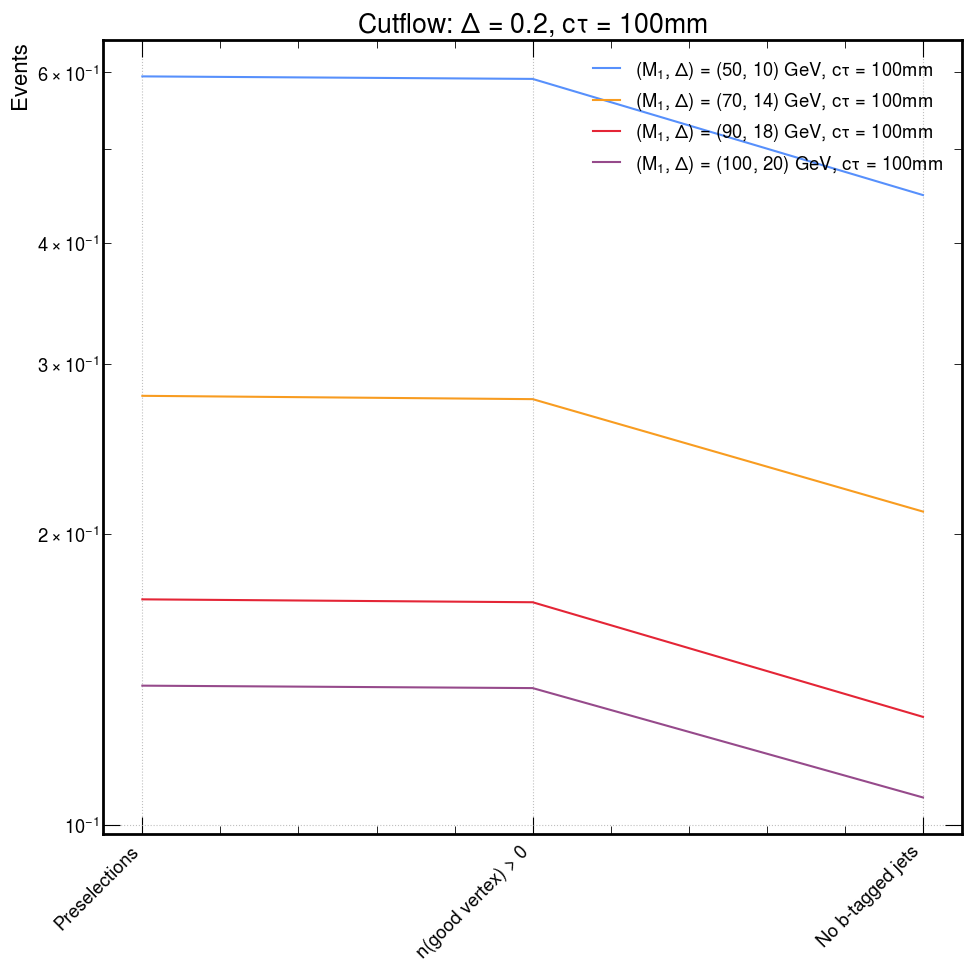

In [23]:
df = utils.get_signal_cutflow_dict(sig_histo, 'cutflow_cts')

fig, axes = plt.subplots()

plot_dict_sig_eff = {
    # Select signal points to display
    'm1s': [50, 70, 90, 100],
    'deltas': [0.1],
    'ctaus': [1],

    # Plot display styling
    'ylim': None, # None for default; otherwise [ymin, ymax]
    'doLog': True,
    
    'ylabel': 'Events', # None for default
    'title': rf"Cutflow", 

    # Plot saving
    'doSave': True,
    'outDir': './plots/cutflow/',
    'outName': ''
}

# Delta 0.1 1mm

for delta in [0.1, 0.2]:
    for ctau in [1, 10, 100]:
        plot_dict_sig_eff['deltas'] = [delta]
        plot_dict_sig_eff['ctaus'] = [ctau]
        
        plot_dict_sig_eff['title'] = rf"Cutflow: $\Delta$ = {delta}, c$\tau$ = {ctau}mm"
        plot_dict_sig_eff['outName'] = rf"Cutflow_{suffix}_signal_delta_{str(delta).replace('.', 'p')}_ct_{ctau}_m50to100.png"
        
        ptools.plot_signal_efficiency(sig_histo, df, plot_dict_sig_eff)

## Background

In [7]:
# efficiency
pd.options.display.float_format = '{:,.8f}'.format

bkg_eff_df = utils.get_bkg_cutflow_df(bkg_histo, 'cutflow')
bkg_eff_df

,Preselections,n(good vertex) > 0,No b-tagged jets
TTX,0.00127165,0.00127165,0.00035061
ZGamma,0.00031387,0.00031387,0.00020100
TTbar,0.00041435,0.00041435,0.00013692
DY-M4to50,0.00002494,0.00002494,0.00001303
SingleTop,0.00022295,0.00022295,0.00009824
Multiboson,0.00062600,0.00062600,0.00037051
ZJets,0.00231871,0.00231871,0.00163076
WJets,0.00096802,0.00096802,0.00063553
QCD,0.00000217,0.00000217,0.00000083
DY-M50,0.00037497,0.00037497,0.00021515


In [8]:
# Save as csv
outdir = './csv/Cutflow/Efficiency/'
outname = f'Background_Efficiency_{suffix}'

df_to_save = bkg_eff_df

utils.save_df_to_csv(df_to_save, outdir, outname)

Saved: ./csv/Cutflow/Efficiency//Background_Efficiency__SRbeforeISRcuts_good_vtx_none_NJetG0.csv


In [9]:
# weighted event count
pd.options.display.float_format = '{:,.2f}'.format
bkg_cts_df = utils.get_bkg_cutflow_df(bkg_histo, 'cutflow_cts', isLegacy = False)

bkg_cts_df

,Preselections,n(good vertex) > 0,No b-tagged jets
TTX,394.77,394.77,108.84
ZGamma,"1,609.71","1,609.71","1,030.85"
TTbar,"20,615.75","20,615.75","6,812.09"
DY-M4to50,355.33,355.33,185.61
SingleTop,"3,467.54","3,467.54","1,528.02"
Multiboson,"4,362.92","4,362.92","2,582.27"
ZJets,"49,623.76","49,623.76","34,900.76"
WJets,"169,523.91","169,523.91","111,296.29"
QCD,"46,583.80","46,583.80","17,763.43"
DY-M50,"4,144.22","4,144.22","2,377.85"


In [10]:
# Save to csv
outdir = './csv/Cutflow/EventCount_Weighted/'
outname = f'Background_EventCount_Weighted_{suffix}'

df_to_save = bkg_cts_df

utils.save_df_to_csv(df_to_save, outdir, outname)

Saved: ./csv/Cutflow/EventCount_Weighted//Background_EventCount_Weighted__SRbeforeISRcuts_good_vtx_none_NJetG0.csv


In [11]:
# raw event count
pd.options.display.float_format = '{:,.0f}'.format
bkg_cts_raw_df = utils.get_bkg_cutflow_df(bkg_histo, 'cutflow_nevts', isLegacy = False)

bkg_cts_raw_df

,Preselections,n(good vertex) > 0,No b-tagged jets
TTX,130908,130908,33986
ZGamma,6251,6251,3650
TTbar,484904,484904,160199
DY-M4to50,24340,24340,9780
SingleTop,43674,43674,20439
Multiboson,23952,23952,13542
ZJets,709551,709551,438672
WJets,1118768,1118768,540417
QCD,30275,30275,7505
DY-M50,254356,254356,85579


In [12]:
outdir = './csv/Cutflow/EventCount_Raw/'
outname = f'Background_EventCount_Raw_{suffix}'

df_to_save = bkg_cts_raw_df

utils.save_df_to_csv(df_to_save, outdir, outname)

Saved: ./csv/Cutflow/EventCount_Raw//Background_EventCount_Raw__SRbeforeISRcuts_good_vtx_none_NJetG0.csv


In [13]:
nBkg = bkg_cts_df.loc['Total'][-1]

print(f'Total number of backgrounds (weighted) after the last SR cut: {nBkg:.2f}')

Total number of backgrounds (weighted) after the last SR cut: 178586.03


In [14]:
pd.options.display.float_format = '{:,.2f}'.format

bkg_composition = pd.concat([pd.DataFrame(bkg_cts_df['No b-tagged jets']).transpose(), pd.DataFrame(bkg_cts_raw_df['No b-tagged jets']).transpose()], ignore_index=True)

bkg_composition = bkg_composition.rename(index={0: 'Weighted Counts', 1: 'Raw Counts'})
bkg_composition

,TTX,ZGamma,TTbar,DY-M4to50,SingleTop,Multiboson,ZJets,WJets,QCD,DY-M50,Total
Weighted Counts,108.84,"1,030.85","6,812.09",185.61,"1,528.02","2,582.27","34,900.76","111,296.29","17,763.43","2,377.85","178,586.03"
Raw Counts,"33,986.00","3,650.00","160,199.00","9,780.00","20,439.00","13,542.00","438,672.00","540,417.00","7,505.00","85,579.00","1,313,769.00"


## Data

In [15]:
pd.options.display.float_format = '{:,.1f}'.format
utils.get_data_cutflow_dict(data_histo, 'cutflow_cts')

,Preselections,n(good vertex) > 0,No b-tagged jets
data_2018_Data_MET_UL18_MET_Run2018C,"68,834.0","68,834.0","33,843.0"
data_2018_Data_MET_UL18_MET_Run2018D,"304,561.0","304,561.0","154,501.0"
data_2018_Data_MET_UL18_MET_Run2018B,"60,605.0","60,605.0","29,312.0"
data_2018_Data_MET_UL18_MET_Run2018A,"119,182.0","119,182.0","56,554.0"
Total,"553,182.0","553,182.0","274,210.0"


In [16]:
# Data/background MC
data_yield = utils.get_data_cutflow_dict(data_histo, 'cutflow_cts').loc['Total']
mc_yield = utils.get_bkg_cutflow_df(bkg_histo, 'cutflow_cts').loc['Total']

data_yield / mc_yield

Preselections        1.8
n(good vertex) > 0   1.8
No b-tagged jets     1.5
Name: Total, dtype: float64

In [17]:
utils.get_data_cutflow_dict(data_histo, 'cutflow_cts').loc['Total']

Preselections        553,182.0
n(good vertex) > 0   553,182.0
No b-tagged jets     274,210.0
Name: Total, dtype: float64

In [18]:
utils.get_bkg_cutflow_df(bkg_histo, 'cutflow_cts').loc['Total']

Preselections        300,681.7
n(good vertex) > 0   300,681.7
No b-tagged jets     178,586.0
Name: Total, dtype: float64

/tmp/ipykernel_196826/3333732702.py:18: MatplotlibDeprecationWarning: The join function was deprecated in Matplotlib 3.6 and will be removed two minor releases later.
  ax.get_shared_x_axes().join(ax, ax_ratio)


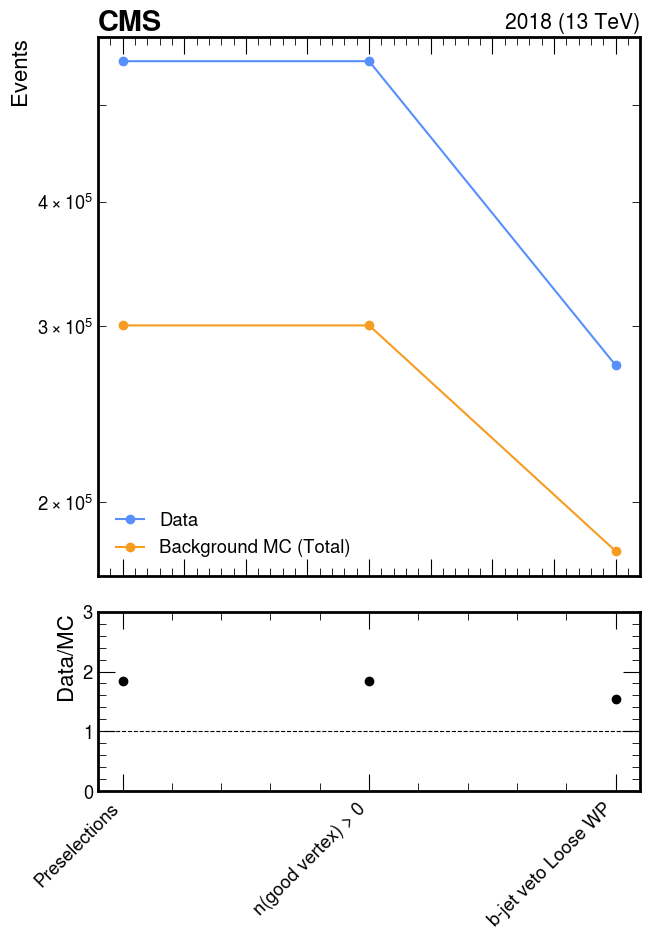

In [19]:
fig, ax = plt.subplots(figsize=(7,7))

mplhep.cms.label('', data=True, year=2018)

data_cutflow = np.array(utils.get_data_cutflow_dict(data_histo, 'cutflow_cts').loc['Total'].to_list())
bkg_cutflow = np.array(utils.get_bkg_cutflow_df(bkg_histo, 'cutflow_cts').loc['Total'].to_list())

plt.plot(data_cutflow, '-o', label='Data')
plt.plot(bkg_cutflow, '-o', label='Background MC (Total)')


plt.legend()

ratio_length = (ax.get_position().y1 - ax.get_position().y0) / 3
ax_ratio = fig.add_axes([ax.get_position().x0, ax.get_position().y0 - ratio_length * 1.2, \
                         ax.get_position().x1 - ax.get_position().x0, ratio_length]) 

ax.get_shared_x_axes().join(ax, ax_ratio)
ax.xaxis.set_ticklabels([])

ax_ratio.set_xlabel(ax.get_xlabel())
ax.set_xlabel('')
ax_ratio.set_ylabel('Data/MC')
ax_ratio.set_ylim([0,3])

ratio = data_cutflow / bkg_cutflow
    
ax_ratio.plot(ratio, 'o', color='black')
    
ax_ratio.axhline(y=1, color='black', linestyle='--', linewidth=0.8)

cuts = utils.get_signal_list_of_cuts(sig_histo)
cuts[1] = 'n(good vertex) > 0'
cuts[2] = 'b-jet veto Loose WP'

plt.xticks(ticks = np.arange(len(data_cutflow)), labels = cuts, rotation = 45, ha = 'right')

ax.set_ylabel('Events')
ax.set_yscale('log')


### Plot the efficiency

Saved: ./plots/cutflow//Cutflow__SRbeforeISRcuts_good_vtx_none_NJetG0_background.png


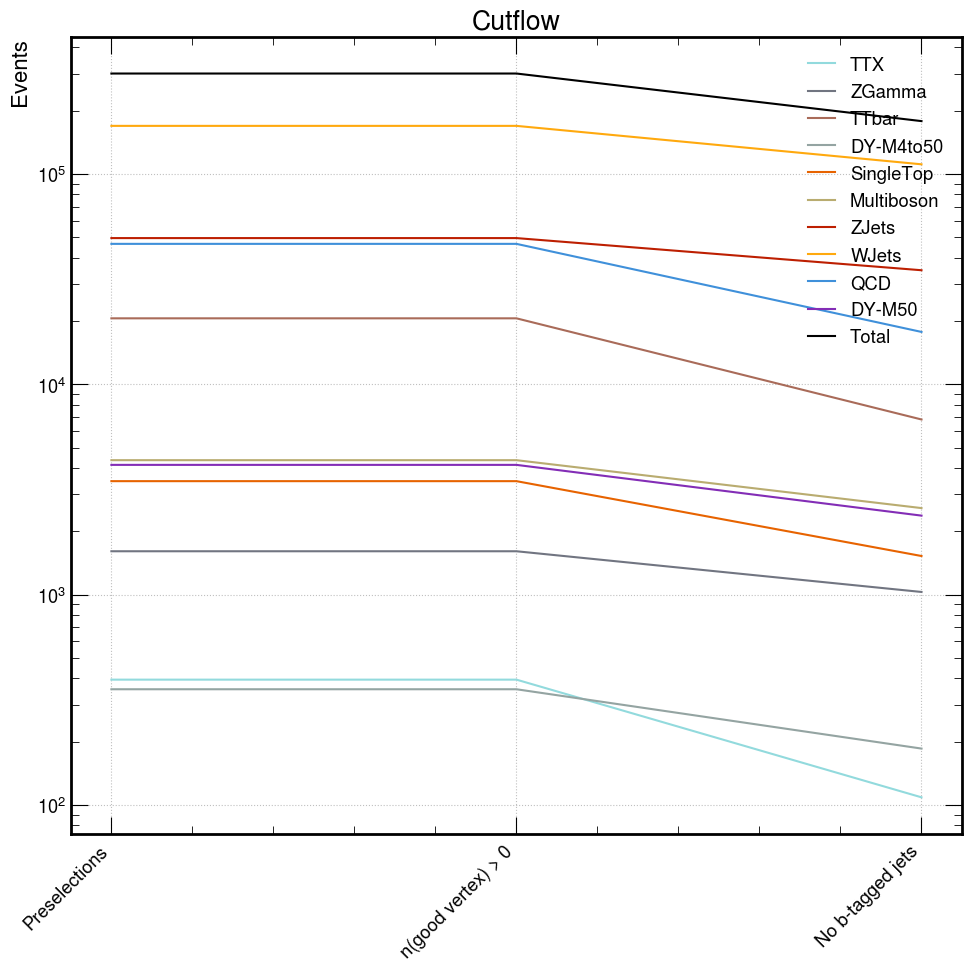

In [20]:
df = utils.get_bkg_cutflow_df(bkg_histo, 'cutflow_cts')

fig, axes = plt.subplots()

plot_dict_bkg_eff = {
    # Select processes
    'processes': 'all', # Otherwise, give as a list; ['WJets', 'ZJets', 'Total']

    # Plot display styling
    'ylim': None, # None for default; otherwise [ymin, ymax]
    'doLog': True,
    
    'ylabel': 'Events', # None for default
    'title': rf"Cutflow", 

    # Plot saving
    'doSave': True,
    'outDir': './plots/cutflow/',
    'outName': f'Cutflow_{suffix}_background.png'
}

# For all processes
ptools.plot_bkg_efficiency(bkg_histo, df, plot_dict_bkg_eff)

## S/sqrt(B)

In [39]:
# S/sqrt(B) cutflow
pd.options.display.float_format = '{:,.5f}'.format
utils.get_s_over_sqrtB_cutflow_dict(sig_histo, bkg_histo)

,Preselections,n(good vertex) > 0,No b-tagged jets
sig_2018_Mchi-99p0_dMchi-18p0_ctau-100,0.00000,0.00000,0.00000
sig_2018_Mchi-94p5_dMchi-9p0_ctau-100,0.00002,0.00002,0.00002
sig_2018_Mchi-99p0_dMchi-18p0_ctau-10,0.00001,0.00001,0.00002
sig_2018_Mchi-99p0_dMchi-18p0_ctau-1,0.00015,0.00015,0.00020
sig_2018_Mchi-88p0_dMchi-16p0_ctau-100,0.00000,0.00000,0.00000
...,...,...,...
sig_2018_Mchi-110p0_dMchi-20p0_ctau-1,0.00011,0.00011,0.00016
sig_2018_Mchi-10p5_dMchi-1p0_ctau-1,0.07449,0.07393,0.10282
sig_2018_Mchi-105p0_dMchi-10p0_ctau-1,0.00310,0.00309,0.00430
sig_2018_Mchi-105p0_dMchi-10p0_ctau-100,0.00001,0.00001,0.00002


Saved: ./plots/cutflow//Cutflow__SRbeforeISRcuts_good_vtx_none_NJetG0_s_over_b_delta_0p1_ct_1_m5to40.png


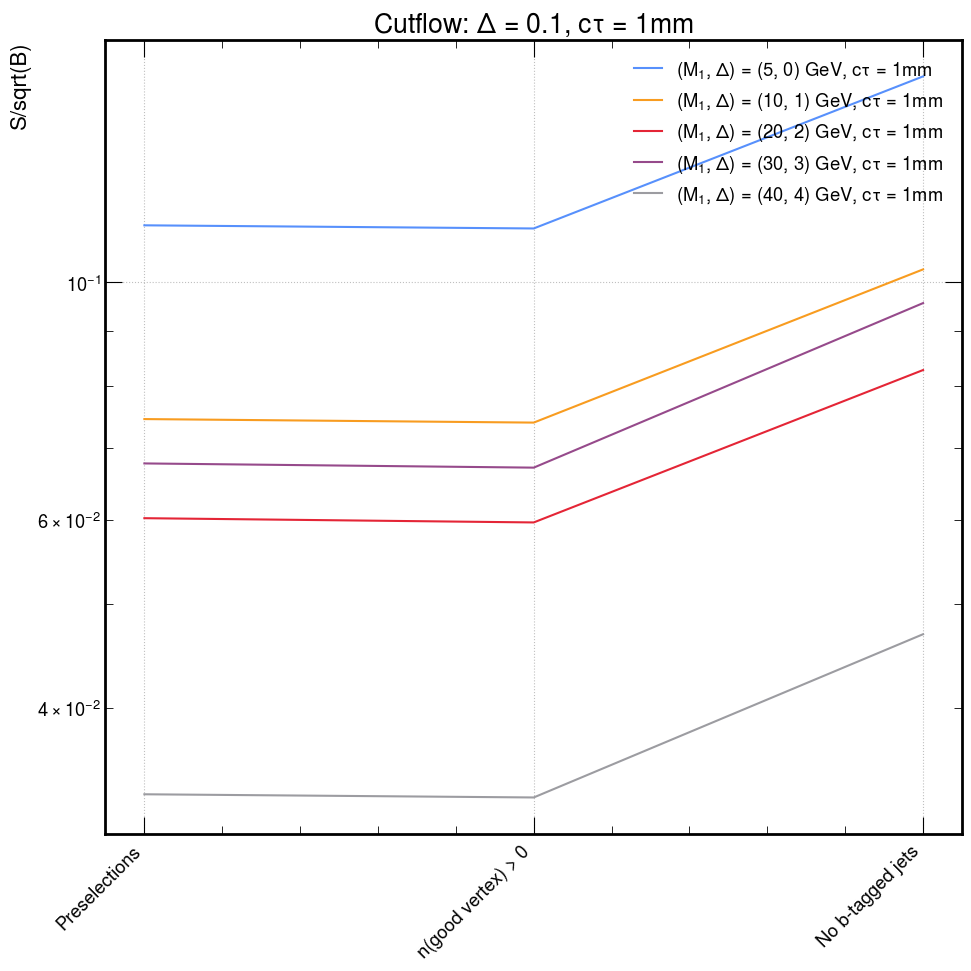

Saved: ./plots/cutflow//Cutflow__SRbeforeISRcuts_good_vtx_none_NJetG0_s_over_b_delta_0p1_ct_10_m5to40.png


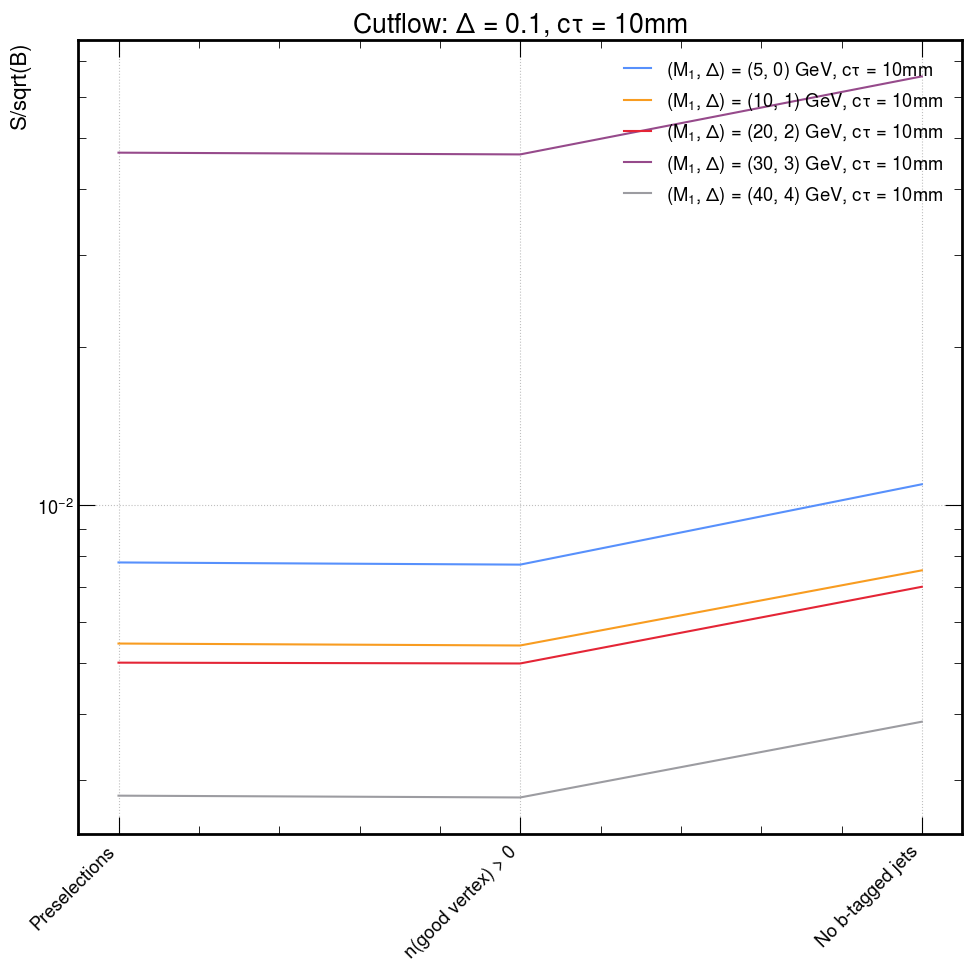

Saved: ./plots/cutflow//Cutflow__SRbeforeISRcuts_good_vtx_none_NJetG0_s_over_b_delta_0p1_ct_100_m5to40.png


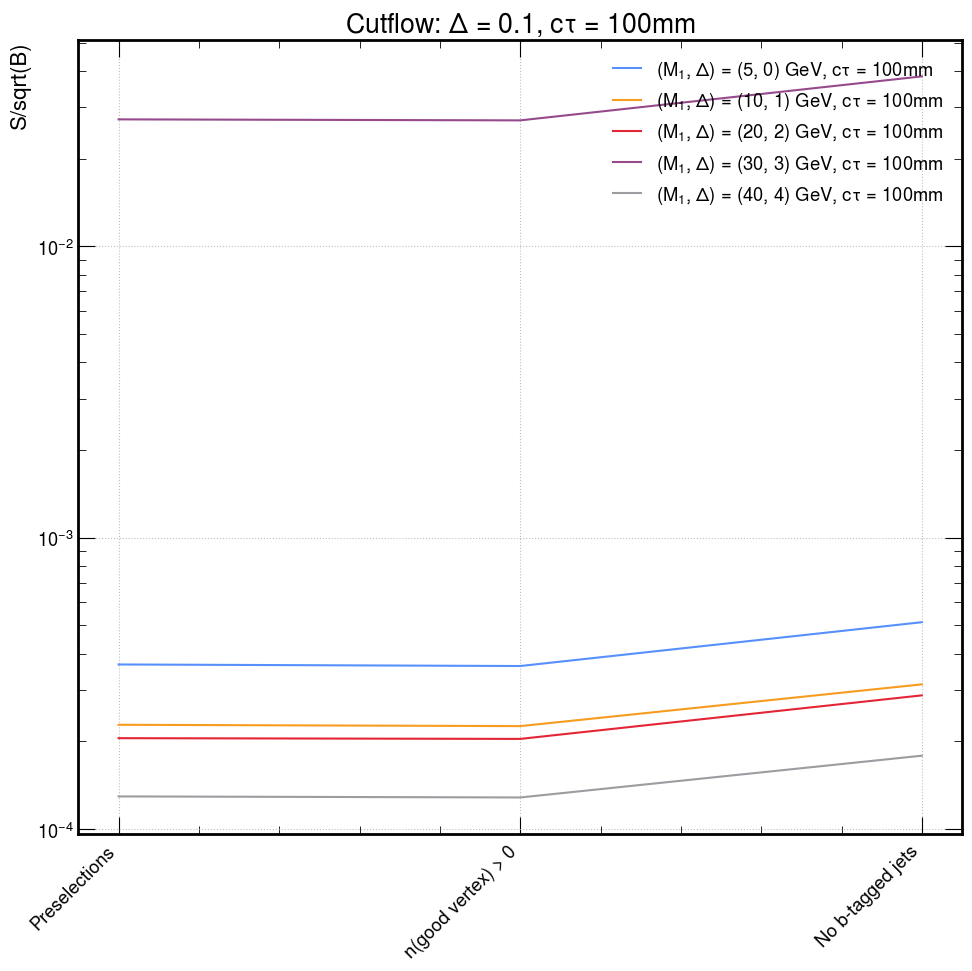

Saved: ./plots/cutflow//Cutflow__SRbeforeISRcuts_good_vtx_none_NJetG0_s_over_b_delta_0p2_ct_1_m5to40.png


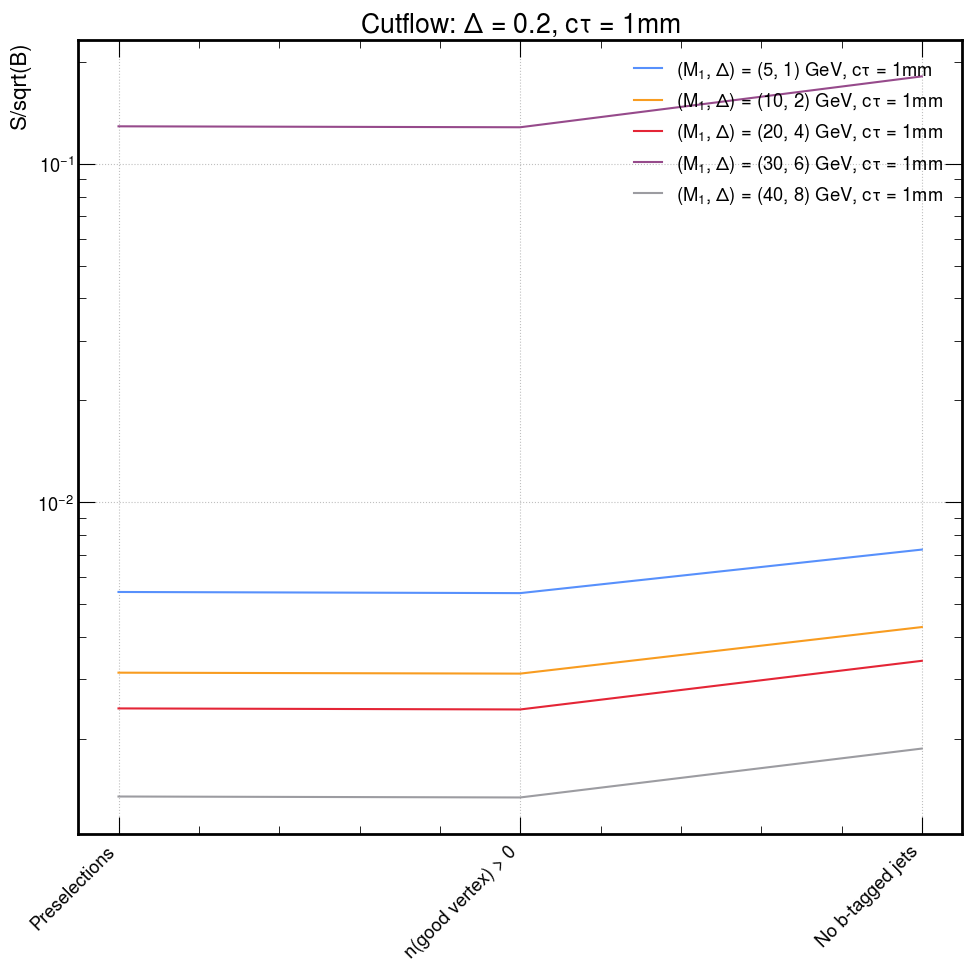

In [ ]:
df = utils.get_s_over_sqrtB_cutflow_dict(sig_histo, bkg_histo)

fig, axes = plt.subplots()

plot_dict_sig_eff = {
    # Select signal points to display
    'm1s': [5, 10, 20, 30, 40],
    'deltas': [0.1],
    'ctaus': [1],

    # Plot display styling
    'ylim': None, # None for default; otherwise [ymin, ymax]
    'doLog': True,
    
    'ylabel': r"S/sqrt(B)", # None for default
    'title': rf"Cutflow", 

    # Plot saving
    'doSave': True,
    'outDir': './plots/cutflow/',
    'outName': ''
}

# Delta 0.1 1mm

for delta in [0.1, 0.2]:
    for ctau in [1, 10, 100]:
        plot_dict_sig_eff['deltas'] = [delta]
        plot_dict_sig_eff['ctaus'] = [ctau]
        
        plot_dict_sig_eff['title'] = rf"Cutflow: $\Delta$ = {delta}, c$\tau$ = {ctau}mm"
        plot_dict_sig_eff['outName'] = rf"Cutflow_{suffix}_s_over_b_delta_{str(delta).replace('.', 'p')}_ct_{ctau}_m5to40.png"
        
        ptools.plot_signal_efficiency(sig_histo, df, plot_dict_sig_eff)

In [ ]:
df = utils.get_s_over_sqrtB_cutflow_dict(sig_histo, bkg_histo)

fig, axes = plt.subplots()

plot_dict_sig_eff = {
    # Select signal points to display
    'm1s': [50, 70, 90, 100],
    'deltas': [0.1],
    'ctaus': [1],

    # Plot display styling
    'ylim': None, # None for default; otherwise [ymin, ymax]
    'doLog': True,
    
    'ylabel': r"S/sqrt(B)", # None for default
    'title': rf"Cutflow", 

    # Plot saving
    'doSave': True,
    'outDir': './plots/cutflow/',
    'outName': ''
}

# Delta 0.1 1mm

for delta in [0.1, 0.2]:
    for ctau in [1, 10, 100]:
        plot_dict_sig_eff['deltas'] = [delta]
        plot_dict_sig_eff['ctaus'] = [ctau]
        
        plot_dict_sig_eff['title'] = rf"Cutflow: $\Delta$ = {delta}, c$\tau$ = {ctau}mm"
        plot_dict_sig_eff['outName'] = rf"Cutflow_{suffix}_s_over_b_delta_{str(delta).replace('.', 'p')}_ct_{ctau}_m50to100.png"
        
        ptools.plot_signal_efficiency(sig_histo, df, plot_dict_sig_eff)

#### S/sqrt(B) at the end of the cutflow

In [ ]:
bkg_cts_df = utils.get_bkg_cutflow_df(bkg_histo, 'cutflow_cts')
nBkg = bkg_cts_df.loc['Total'][-1]

nBkg

In [ ]:
cts_cutflow = utils.get_signal_cutflow_dict(sig_histo, 'cutflow_cts')
table = cts_cutflow

cutnames = utils.get_signal_list_of_cuts(sig_histo)
table.columns = cutnames

In [ ]:
pd.options.display.float_format = '{:,.4f}'.format

In [ ]:
df = pd.DataFrame(table.loc[:, cutnames[-1]]) # last cut
df = utils.add_signal_info_to_df(df)
df

In [ ]:
# Missing rows
#df[ (df['m1'] == 60) & (df['delta'] == 0.2) ]

df.loc[len(df.index)] = [0, 60, 0.2, 1]
df.loc[len(df.index)] = [0, 60, 0.2, 10]
df.loc[len(df.index)] = [0, 60, 0.2, 100]
df.loc[len(df.index)] = [0, 80, 0.2, 1] 

df = df.sort_values(by=['m1']) # sort by m1

In [ ]:
df = df.rename(columns={df.columns[0]: 'Signal'})

df['Background'] = nBkg
df['S/sqrt(B)'] = df['Signal'] / np.sqrt(df['Background'])

df = df[['m1', 'delta', 'ctau', 'Signal', 'Background', 'S/sqrt(B)']]

df

In [ ]:
outdir = './csv/SR_Yields/'
outname = f'S_over_B_{suffix}'

df_to_save = df

utils.save_df_to_csv(df_to_save, outdir, outname)

### ctau = 1mm

In [ ]:
ct = 1.0

In [ ]:
pd.options.display.float_format = '{:,.4f}'.format

# S/sqrt(B) in ctau = 1mm, delta = 0.1
delta = 0.1

df_to_show = df[ (df.ctau == ct) & (df.delta == delta) ]
df_to_show.loc[:, 'm1'] = df_to_show.loc[:, 'm1'].map('{:,.1f}'.format)
df_to_show.loc[:, 'delta'] = df_to_show.loc[:, 'delta'].map('{:,.1f}'.format)
df_to_show.loc[:, 'ctau'] = df_to_show.loc[:, 'ctau'].map('{:,.1f}'.format)

df_to_show

In [ ]:
pd.options.display.float_format = '{:,.4f}'.format

# S/sqrt(B) in ctau = 1mm, delta = 0.2
delta = 0.2

df_to_show = df[ (df.ctau == ct) & (df.delta == delta) ]
df_to_show.loc[:, 'm1'] = df_to_show.loc[:, 'm1'].map('{:,.1f}'.format)
df_to_show.loc[:, 'delta'] = df_to_show.loc[:, 'delta'].map('{:,.1f}'.format)
df_to_show.loc[:, 'ctau'] = df_to_show.loc[:, 'ctau'].map('{:,.1f}'.format)

df_to_show

### ctau = 10mm

In [ ]:
ct = 10.0

In [ ]:
pd.options.display.float_format = '{:,.4f}'.format

# S/sqrt(B) in ctau = 1mm, delta = 0.1
delta = 0.1

df_to_show = df[ (df.ctau == ct) & (df.delta == delta) ]
df_to_show.loc[:, 'm1'] = df_to_show.loc[:, 'm1'].map('{:,.1f}'.format)
df_to_show.loc[:, 'delta'] = df_to_show.loc[:, 'delta'].map('{:,.1f}'.format)
df_to_show.loc[:, 'ctau'] = df_to_show.loc[:, 'ctau'].map('{:,.1f}'.format)

df_to_show

In [ ]:
pd.options.display.float_format = '{:,.4f}'.format

# S/sqrt(B) in ctau = 1mm, delta = 0.2
delta = 0.2

df_to_show = df[ (df.ctau == ct) & (df.delta == delta) ]
df_to_show.loc[:, 'm1'] = df_to_show.loc[:, 'm1'].map('{:,.1f}'.format)
df_to_show.loc[:, 'delta'] = df_to_show.loc[:, 'delta'].map('{:,.1f}'.format)
df_to_show.loc[:, 'ctau'] = df_to_show.loc[:, 'ctau'].map('{:,.1f}'.format)

df_to_show

### ctau = 100mm

In [ ]:
ct = 100.0

In [ ]:
pd.options.display.float_format = '{:,.4f}'.format

# S/sqrt(B) in ctau = 1mm, delta = 0.1
delta = 0.1

df_to_show = df[ (df.ctau == ct) & (df.delta == delta) ]
df_to_show.loc[:, 'm1'] = df_to_show.loc[:, 'm1'].map('{:,.1f}'.format)
df_to_show.loc[:, 'delta'] = df_to_show.loc[:, 'delta'].map('{:,.1f}'.format)
df_to_show.loc[:, 'ctau'] = df_to_show.loc[:, 'ctau'].map('{:,.1f}'.format)

df_to_show

In [ ]:
pd.options.display.float_format = '{:,.4f}'.format

# S/sqrt(B) in ctau = 1mm, delta = 0.2
delta = 0.2

df_to_show = df[ (df.ctau == ct) & (df.delta == delta) ]
df_to_show.loc[:, 'm1'] = df_to_show.loc[:, 'm1'].map('{:,.1f}'.format)
df_to_show.loc[:, 'delta'] = df_to_show.loc[:, 'delta'].map('{:,.1f}'.format)
df_to_show.loc[:, 'ctau'] = df_to_show.loc[:, 'ctau'].map('{:,.1f}'.format)

df_to_show